# Dimensionality Reduction Using PCA
---------------------------------------------------------------------------------------------------------------
### Using PCA To Perform Dimensionality Reduction On Handwritten Digits Dataset

We'll be using sklearn's digits dataset to attempt to perform dimensionality reduction on it using PCA.
First we'll need to analyze the dataset.

### Steps

- Loading and Analyzing Dataset
- Scaling the dataset
- Show data before PCA
- Train and test data before PCA
- Run PCA on dataset
- Show data after PCA
- Train and test data after PCA
- Compare results

In [63]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [47]:
dataset = load_digits()
print(dataset.keys())
print(dataset.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


Above stated that we have 8 labels for the main dataset, although we're more interested in what's in the data column. Based on the output of the `dataset.data.shape`, we know that we have 1797 rows of data, and each rows have 64 features, each of these features represent the pixel of the image that we're going to use in our unsupervised learning later. First, we can reshape data into 2 dimensional arrays in case we want to be able to visualize the content.

<Figure size 432x288 with 0 Axes>

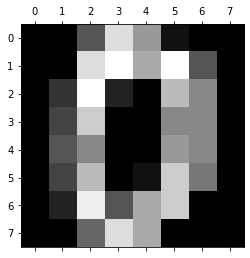

In [48]:
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

As you can see above, we've reshaped the data in index 0 to 8x8, and we're able to visualize the image, and it appears to be the number 0. Here's our full data in our dataset.

In [49]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In order to get better result with PCA, we need to scale our data so as to not confuse PCA with uneven X and Y axis.

In [51]:
X = df
y = dataset.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [52]:
scaled_df = pd.DataFrame(X_scaled, columns=dataset.feature_names)
scaled_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [53]:
scaled_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-2.560865e-16,-2.347717e-16,-3.053268e-16,1.396892e-16,-3.169418e-16,-9.595984e-16,6.069466e-16,-4.623690e-16,7.550850e-17,...,4.715822e-16,-4.920321e-16,2.253538e-16,3.441259e-16,5.952698e-17,-6.114606e-16,-5.190926e-16,1.695299e-16,1.787972e-16,-6.838961e-16
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524e+00,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


Traning before PCA : 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

Before PCA, we're able to obtain up to 97% accuracy more or less. Let's see if we can maintain this high accuracy after performing dimensionality reduction using PCA.

-----------------------------------------------------------------------------------------------------------------------------

### Performing PCA 

PCA will perform dimensionality reduction as visualized below

![PCA](https://miro.medium.com/max/1400/1*T7CqlFV5aRm6MxO5nJt7Qw.gif)

First, we'll try to maintain 95% of useful information, without specifically telling PCA of how many Principal Components we need for the result.

In [56]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

As stated above, our features has been reduced from 64 to 29, which means that now we got 29 PCs

In [62]:
scaled_df = pd.DataFrame(X_pca)
scaled_df = scaled_df.add_prefix('PC_')
scaled_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,-0.943669,-1.132502
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,-5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,-0.510227,2.313549
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,2.157657,0.837958
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,-3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,4.682220,-1.113042
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,0.627979,-3.287348


Now we'll run a test using the data returned by PCA :

In [66]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [67]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

After maintaining 95% of the dataset information and performing dimensionality reduction using PCA , we're able to obtain up to 96% accuracy more or less. Previously we had 64 features, and now we only have 29 features, as you can see, reducing that many features only affects 1% of the accuracy. Now we'll attempt to use only 2 PCs in our next test.

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [69]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

Above is the variance ratio of our new PCA data, if we combine these two numbers, we'll obtain the percentage of the features that we kept which is 0.14+0.13=0.27 or 27% of important feature information. Now we'll see how 27% of features will fare in our LogisticRegression test.

In [72]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

After only using 27% of features of our original data, we manage to get accuracy up to 60%.

We have demostrated the capability and the potential use of PCA in your future machine-learning endeavors